### **Load Dataset**

In [ ]:
!pip install NRCLex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import libraries
import pandas as pd
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import f1_score
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
cols=['statement','favorite_count', 'retweeted', 'retweet_count','favorited',
    'user_profile_use_background_image', 'user_default_profile_image', 
    'user_verified', 'user_profile_location', 'user_followers_count', 'user_friends_count', 
    'user_location', 'user_favourites_count', 'user_following', 'user_notifications', 
    'user_created_at', 'user_contributors_enabled',  
    'user_protected','in_reply_to_status_id_str', 'label']
x={}
for a, b in zip( range(20), cols ):
  x[str(a)]=b
 

In [ ]:
# Concat datasets into single dataframe for feature extractions
df=pd.read_csv('/content/drive/MyDrive/threads.csv')
df=df.rename(columns=x)
df.head()

,statement,favorite_count,retweeted,retweet_count,favorited,user_profile_use_background_image,user_default_profile_image,user_verified,user_profile_location,user_followers_count,user_friends_count,user_location,user_favourites_count,user_following,user_notifications,user_created_at,user_contributors_enabled,user_protected,in_reply_to_status_id_str,label
0,"Breaking: At least 10 dead, 5 injured after tO...",14,False,159,False,True,False,False,NaN,1628,246,Paris,5,False,False,Tue Oct 04 09:36:17 +0000 2011,False,False,NaN,rumour
1,France: 10 people dead after shooting at HQ of...,38,False,486,False,True,False,True,NaN,129573,337,Europe,615,False,False,Wed Mar 18 12:57:11 +0000 2009,False,False,NaN,rumour
2,Ten killed in shooting at headquarters of Fren...,15,False,127,False,True,False,True,NaN,529882,3051,Weekdays at 7 on Channel 4,82,False,False,Mon Apr 28 14:29:37 +0000 2008,False,False,NaN,rumour
3,BREAKING: 10 dead in shooting at headquarters ...,15,False,105,False,True,False,True,NaN,499741,31,Dubai,16,False,False,Sat Feb 28 08:31:32 +0000 2009,False,False,NaN,rumour
4,Reuters: 10 people shot dead at headquarters o...,32,False,412,False,True,False,True,NaN,1377384,6,"London, UK",0,False,False,Wed Nov 04 11:25:45 +0000 2009,False,False,NaN,rumour


(array([0, 1]), [Text(0, 0, 'rumour'), Text(1, 0, 'non-rumour')])

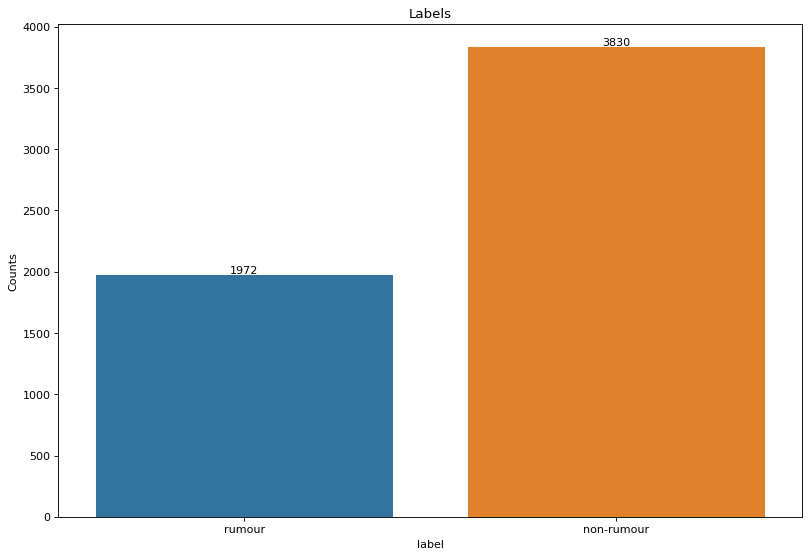

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)

ax=sns.countplot(x=df['label'])

for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('Counts')
plt.title('Labels')
plt.xticks(rotation=0)

## **Syntax-based /Lexical Features Extraction**

In [ ]:
# Char count extraction
statements=df['statement'].to_list()
char_count=[]
for statement in statements:
  char_count.append(len(statement))
df['char_count']=char_count

In [ ]:
# Word count extraction
word_count=[]
for statement in statements:
  word_count.append(len(statement.split(' ')))
df['word_count']=word_count

In [ ]:
# sentence_count extraction
sentence_count=[]
for statement in statements:
  sentence_count.append(len(sent_tokenize(statement)) )
df['sentence_count']= sentence_count

In [ ]:
# Stop word count
nltk.download('stopwords')
stops = set(stopwords.words('english'))
stopword_count=[]
for statement in statements:
  word_tokens = word_tokenize(statement) 
  stopwords_x = len([w for w in word_tokens if w in stops])
  stopword_count.append(stopwords_x)
df['stopword_count']=stopword_count

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Upper case word count
Uppercase_count=[]
for statement in statements:
  word_tokens = word_tokenize(statement) 
  Uppercase_x = len([w for w in word_tokens if w.isupper()])
  Uppercase_count.append(Uppercase_x)
df['Uppercase_count']=Uppercase_count

In [ ]:
# Average word length
Averageword_len=[]
for statement in statements:
  sum_wordlenght=0
  word_tokens = word_tokenize(statement) 
  for w in word_tokens:
    sum_wordlenght=sum_wordlenght + len(w)

  Averageword_len.append(sum_wordlenght/len(word_tokens))

df['Averageword_len']=Averageword_len

In [ ]:
# Average sentence length
df['avgsentence_len']=  df['word_count'] / df['sentence_count']

In [ ]:
# Punctuations counts 
Punctuations_count=[]
punc=string.punctuation
for statement in statements:
  Punctuations_x = len([w for w in statement if w in punc])
  Punctuations_count.append(Punctuations_x)
df['Punctuations counts']=Punctuations_count

In [ ]:
# Number count
Number_count=[]
for statement in statements:
  word_tokens = word_tokenize(statement) 
  Number_x = len([w for w in word_tokens if w.isdigit()])
  Number_count.append(Number_x)
df['Number_count']=Number_count

In [ ]:
# Counting POS tags 
NN=[]
CC=[]
JJ=[]
VB=[]
for statement in statements:
  tokens = nltk.word_tokenize(statement.lower())
  text = nltk.Text(tokens)
  tagged = nltk.pos_tag(text)
  from collections import Counter
  counts = Counter(tag for word, tag in tagged)

  if 'NN' in counts:
    NN.append(counts['NN'])
  else:
    NN.append(0)

  if 'CC' in counts:
    CC.append(counts['CC'])
  else:
    CC.append(0)

  if 'JJ' in counts:
    JJ.append(counts['JJ'])
  else:
    JJ.append(0)

  if 'VB' in counts:
    VB.append(counts['VB'])
  else:
    VB.append(0)


df['noun']=NN
df['conjunction']=CC
df['adjective']=JJ
df['verb']=VB

In [ ]:
# Counting POS tags 

RB=[]
IN=[]
PRP=[]
for statement in statements:
  tokens = nltk.word_tokenize(statement.lower())
  text = nltk.Text(tokens)
  tagged = nltk.pos_tag(text)
  from collections import Counter
  counts = Counter(tag for word, tag in tagged)
  
  if 'RB' in counts:
    RB.append(counts['RB'])
  else:
    RB.append(0)

  if 'IN' in counts:
    IN.append(counts['IN'])
  else:
    IN.append(0)

  if 'PRP' in counts:
    PRP.append(counts['PRP'])
  else:
    PRP.append(0)

df['adverb']=RB
df['preposition']=IN
df['pronoun']=PRP

## **Sentiment-based Features**

In [ ]:
from textblob import TextBlob

#Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity


  
 #Create three new columns ‘Subjectivity’ & ‘Polarity & Emotions’
df['Subjectivity']  =    df['statement'].apply(getSubjectivity)
df['Polarity']      =       df['statement'].apply(getPolarity)

## **LIWC Feature Extraction**

In [ ]:
# NRC Word-Emotion Association Lexicon

from nrclex import NRCLex

Fear =[]
Anger =[]
Anticipation =[]
Trust =[]
Surprise =[]
Positive =[]
Negative =[]
Sadness =[]
Disgust =[]
Joy =[]

for statement in df['statement'].values:
    text_object = NRCLex(statement)
    data = text_object.raw_emotion_scores

    if 'fear' in data:
      Fear.append(data['fear'])
    else:
      Fear.append(0)

    if 'anger' in data:
      Anger.append(data['anger'])
    else:
      Anger.append(0)

    if 'anticipation'in data:
      Anticipation.append(data['anticipation'])
    else:
      Anticipation.append(0)

    if 'trust'in data:
      Trust.append(data['trust'])
    else:
      Trust.append(0)

    if 'surprise' in data:
      Surprise.append(data['surprise'])
    else:
      Surprise.append(0)
      
    if 'positive'in data:
      Positive.append(data['positive'])
    else:
      Positive.append(0)
      
    if 'negative' in data:
      Negative.append(data['negative'])
    else:
      Negative.append(0)

    if 'sadness' in data:
      Sadness.append(data['sadness'])
    else:
      Sadness.append(0)

    if 'disgust'in data:
      Disgust.append(data['disgust'])
    else:
      Disgust.append(0)

    if 'joy' in data:
      Joy.append(data['joy'])
    else:
      Joy.append(0)


df['Fear'] =Fear
df['Anger'] =Anger
df['Anticipation'] = Anticipation
df['Trust'] =  Trust
df['Surprise'] = Surprise
df['Positive'] = Positive
df['Negative'] = Negative
df['Sadness'] = Sadness
df['Disgust'] =  Disgust
df['Joy'] =  Joy

## **Readability-based Features Extraction**

In [ ]:
! pip install textstat
import textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def fk(text):
  #Flesch-Kincaid score
  fk=textstat.flesch_kincaid_grade(text)
  return fk

def f(text):
  # Flesch Reading Ease
  f=textstat.flesch_reading_ease(text)
  return f
  
  

def gf(text):
  #Gunning Fog index
  gf=textstat.gunning_fog(text)
  return gf


def cl(text):
  #Coleman Liau
  cl=textstat.coleman_liau_index(text)
  return cl

def ar(text):
  #Automated Readability Index
  Ari=textstat.automated_readability_index(text)
  return Ari

def s(text):
  # The SMOG Index
  s=textstat.smog_index(text)
  return s

In [ ]:
df['Flesch Reading Ease']  =    df['statement'].apply(f)
df['Automated Readability Index']      =       df['statement'].apply(ar)
df['Gunning Fog index']  =    df['statement'].apply(gf)
df['Coleman Liau']      =       df['statement'].apply(cl)
df['Flesch-Kincaid score']  =    df['statement'].apply(fk)
df['The SMOG Index']      =       df['statement'].apply(s)

In [ ]:
df.loc[:, 'char_count':]

,char_count,word_count,sentence_count,stopword_count,Uppercase_count,Averageword_len,avgsentence_len,Punctuations counts,Number_count,noun,...,Negative,Sadness,Disgust,Joy,Flesch Reading Ease,Automated Readability Index,Gunning Fog index,Coleman Liau,Flesch-Kincaid score,The SMOG Index
0,139,23,1,4,0,4.500000,23.0,3,2,5,...,1,1,0,0,57.61,14.6,10.62,12.76,10.7,0.0
1,134,17,1,4,1,5.363636,17.0,8,1,5,...,1,0,0,0,28.84,19.8,16.21,19.95,13.5,0.0
2,123,18,1,3,0,5.300000,18.0,2,0,2,...,1,0,0,0,44.75,15.3,13.87,15.95,11.5,0.0
3,127,18,2,3,1,5.000000,9.0,5,1,2,...,1,0,0,0,37.30,17.5,16.21,18.27,12.3,0.0
4,139,21,1,5,0,5.173913,21.0,2,1,5,...,1,1,0,0,41.70,15.8,14.11,15.03,12.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,88,13,1,3,0,5.066667,13.0,5,0,8,...,1,0,0,0,66.74,12.6,8.28,13.50,7.2,0.0
5798,103,10,2,3,0,5.222222,5.0,14,0,6,...,0,0,0,0,19.03,27.8,12.00,27.64,13.1,0.0
5799,119,13,1,2,0,5.944444,13.0,11,0,9,...,2,0,0,1,66.74,23.8,5.20,24.64,7.2,0.0
5800,135,15,1,7,0,5.761905,15.0,12,0,6,...,1,0,0,0,39.33,24.1,8.67,24.29,11.5,0.0


## **Data Preprocessing For Model**

In [ ]:
X=df.loc[:, 'char_count':]
df['label']=df['label'].map({'non-rumour': 0, 'rumour':1})
Y=df['label']
# split data to train, test, val
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## **Traditional Models with Feature Extraction**

### **Lightgbm**

In [ ]:
# Light GBM
import lightgbm as lgb
Lr=lgb.LGBMClassifier()
Lr.fit(X_train, Y_train )
print('Train Accuracy Score: ', Lr.score(X_train, Y_train ) )
print('Test Accuracy Score: ', Lr.score(X_test, Y_test ) )
y_pred=Lr.predict(X_test)
print('F1 Score', f1_score(Y_test, y_pred) )
  


Train Accuracy Score:  0.9405711345510677
Test Accuracy Score:  0.7315926892950392
F1 Score 0.5506993006993007


### **Random Forest**

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train, Y_train )
print('Train Accuracy Score: ', rf.score(X_train, Y_train ) )
print('Test Accuracy Score: ', rf.score(X_test, Y_test ) )

y_pred=rf.predict(X_test)
print('F1 Score', f1_score(Y_test, y_pred) )


Train Accuracy Score:  0.9992281965526113
Test Accuracy Score:  0.7065274151436032
F1 Score 0.4346076458752515


### **Logistic regression**

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train, Y_train)
print('Train Accuracy Score: ', logr.score(X_train, Y_train ) )
print('Test Accuracy Score: ', logr.score(X_test, Y_test ) )

y_pred=logr.predict(X_test)
print('F1 Score', f1_score(Y_test, y_pred) )

Train Accuracy Score:  0.7193208129662979
Test Accuracy Score:  0.7060052219321149
F1 Score 0.46736045411542104


### **Catboost**

In [ ]:
!pip install catboost 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Catboost
import catboost 
from catboost import CatBoostClassifier
clf = CatBoostClassifier(verbose=0)
clf.fit(X_train, Y_train)
print('Train Accuracy Score: ', clf.score(X_train, Y_train ) )
print('Test Accuracy Score: ', clf.score(X_test, Y_test ) )

y_pred=clf.predict(X_test)
print('F1 Score', f1_score(Y_test, y_pred) )

Train Accuracy Score:  0.8862876254180602
Test Accuracy Score:  0.7357702349869452
F1 Score 0.5399999999999999


### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, Y_train)
print('Train Accuracy Score: ', gnb.score(X_train, Y_train ) )
print('Test Accuracy Score: ', gnb.score(X_test, Y_test ) )

y_pred=gnb.predict(X_test)
print('F1 Score', f1_score(Y_test, y_pred) )


Train Accuracy Score:  0.6315924877797787
Test Accuracy Score:  0.6454308093994778
F1 Score 0.5847094801223242


# **Traditional Models with TFIDF Feature Extraction**

PREPROCESS

In [ ]:
# All letters in the document are converted to lowercase
df['statement']=df['statement'].str.lower()


# Numbers are removed
df['statement'] = df['statement'].str.replace('\d+', '')


#Punctuations, accent marks are removed
import string 
df['statement']=df['statement'].str.replace('[{}]'.format(string.punctuation), '')


# White spaces are remove
df['statement']=df['statement'].str.strip()


#Stop words are expelled
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

df['statement']=df['statement'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


<ipython-input-102-55d7e31e5d04>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['statement'] = df['statement'].str.replace('\d+', '')
<ipython-input-102-55d7e31e5d04>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['statement']=df['statement'].str.replace('[{}]'.format(string.punctuation), '')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X=df['statement']
Y=df['label']
# split data to train, test, val
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


### **Catboost**

In [ ]:
#Catboost
import catboost 
from catboost import CatBoostClassifier
clf = CatBoostClassifier(verbose=0)
clf.fit(X_train, Y_train)
print('Train Accuracy Score: ', clf.score(X_train, Y_train ) )
print('Test Accuracy Score: ', clf.score(X_test, Y_test ) )

y_pred=clf.predict(X_test)
print('F1 Score', f1_score(Y_test, y_pred) )


Train Accuracy Score:  0.9073835863133523
Test Accuracy Score:  0.8407310704960835
F1 Score 0.7581284694686756


### **Lightgbm**

In [ ]:
# Light GBM
import lightgbm as lgb
Lr=lgb.LGBMClassifier()
Lr.fit(X_train, Y_train )
print('Train Accuracy Score: ', Lr.score(X_train, Y_train ) )
print('Test Accuracy Score: ', Lr.score(X_test, Y_test ) )

  
y_pred=Lr.predict(X_test)
print('F1 Score', f1_score(Y_test, y_pred) )

Train Accuracy Score:  0.9318240288139954
Test Accuracy Score:  0.8172323759791122
F1 Score 0.732824427480916


### **Random Forest**

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, Y_train )
print('Train Accuracy Score: ', rf.score(X_train, Y_train ) )
print('Test Accuracy Score: ', rf.score(X_test, Y_test ) )

y_pred=rf.predict(X_test)
print('F1 Score', f1_score(Y_test, y_pred) )

Train Accuracy Score:  0.9997427321842037
Test Accuracy Score:  0.8417754569190601
F1 Score 0.7674597083653109


### **Logistic regression**

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train, Y_train)
print('Train Accuracy Score: ', logr.score(X_train, Y_train ) )
print('Test Accuracy Score: ', logr.score(X_test, Y_test ) )

y_pred=logr.predict(X_test)
print('F1 Score', f1_score(Y_test, y_pred) )

Train Accuracy Score:  0.89452019552354
Test Accuracy Score:  0.829242819843342
F1 Score 0.7304204451772465


### **Naives Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
X_train=X_train.toarray()
X_test=X_test.toarray()
gnb.fit(X_train, Y_train)

print('Train Accuracy Score: ', gnb.score(X_train, Y_train ) )
print('Test Accuracy Score: ', gnb.score(X_test, Y_test ) )


y_pred=gnb.predict(X_test)
print('F1 Score', f1_score(Y_test, y_pred) )

Train Accuracy Score:  0.9737586827887831
Test Accuracy Score:  0.7368146214099217
F1 Score 0.664


# **Deep Learning**

In [ ]:
X=df['statement']
Y=df['label']
# split data to train, test, val
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)



In [ ]:
# import tensorflow libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenize dataset
num_words=5000
tokenizer=Tokenizer(num_words=num_words, oov_token='oov')
tokenizer.fit_on_texts(X_train)
tok_train=tokenizer.texts_to_sequences(X_train)
tok_test=tokenizer.texts_to_sequences(X_test)


# pad the tokenized text
pad_train=pad_sequences(tok_train,maxlen=200,padding='pre', truncating='post')
pad_test=pad_sequences(tok_test,maxlen=200,padding='pre', truncating='post')


In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(input_dim=5000,output_dim=64,input_length=200),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                           tf.keras.layers.Dense(64, activation='relu'),
                           tf.keras.layers.Dense(64, activation='relu'),
                           tf.keras.layers.Dense(2, activation='softmax')]) 

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 64)           320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 398,594
Trainable params: 398,594
Non-trainable params: 0
________________________________________________

In [ ]:
# Training deep learning model
y_train=np.array(Y_train)
y_test=np.array(Y_test)
hist=model.fit(pad_train, y_train, epochs=5,validation_data=(pad_test,y_test))

Epoch 1/5
122/122 [==============================] - 16s 95ms/step - loss: 0.4935 - accuracy: 0.7556 - val_loss: 0.3564 - val_accuracy: 0.8470
Epoch 2/5
122/122 [==============================] - 4s 35ms/step - loss: 0.2359 - accuracy: 0.9056 - val_loss: 0.3567 - val_accuracy: 0.8585
Epoch 3/5
122/122 [==============================] - 4s 36ms/step - loss: 0.1336 - accuracy: 0.9485 - val_loss: 0.4400 - val_accuracy: 0.8475
Epoch 4/5
122/122 [==============================] - 3s 26ms/step - loss: 0.0789 - accuracy: 0.9730 - val_loss: 0.4902 - val_accuracy: 0.8449
Epoch 5/5
122/122 [==============================] - 3s 29ms/step - loss: 0.0757 - accuracy: 0.9732 - val_loss: 0.5221 - val_accuracy: 0.8439
